<a href="https://colab.research.google.com/github/AngelTroncoso/Arbol_de_desicion/blob/main/Arbol_de_desici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #**Árboles de Decisión para Regresión (Decision Trees for Regression) 🌳**

##1: Cargar los Datos:

In [1]:
import pandas as pd
import io

csv_data = """ID_Casa,Habitaciones,Banios,Area_m2,Jardin,Precio_USD
1,3,2,150,Si,250000
2,2,1,100,No,180000
3,4,3,200,Si,350000
4,3,2,160,No,270000
5,5,4,250,Si,450000
6,2,2,120,Si,220000
7,1,1,70,No,120000
8,4,2,180,Si,300000
9,3,1,130,No,200000
10,5,3,220,Si,400000
11,2,1,90,No,160000
12,4,3,210,Si,380000
"""
df = pd.read_csv(io.StringIO(csv_data))
print(df.head())

   ID_Casa  Habitaciones  Banios  Area_m2 Jardin  Precio_USD
0        1             3       2      150     Si      250000
1        2             2       1      100     No      180000
2        3             4       3      200     Si      350000
3        4             3       2      160     No      270000
4        5             5       4      250     Si      450000


##2: Preprocesamiento (One-Hot Encoding):

In [2]:
df['Jardin'] = df['Jardin'].apply(lambda x: 1 if x == 'Si' else 0)
print("\nDataFrame después de One-Hot Encoding:")
print(df.head())


DataFrame después de One-Hot Encoding:
   ID_Casa  Habitaciones  Banios  Area_m2  Jardin  Precio_USD
0        1             3       2      150       1      250000
1        2             2       1      100       0      180000
2        3             4       3      200       1      350000
3        4             3       2      160       0      270000
4        5             5       4      250       1      450000


##3: Definir Características (X) y Variable Objetivo (y):

In [3]:
X = df.drop(['ID_Casa', 'Precio_USD'], axis=1)
y = df['Precio_USD']

##4: Dividir Datos (Entrenamiento y Prueba):

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##5: Entrenar Modelo de Árbol de Decisión:

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# max_depth puede ayudar a controlar el overfitting
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n--- Resultados Árbol de Decisión ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R^2: {r2_score(y_test, y_pred_dt):.2f}")


--- Resultados Árbol de Decisión ---
MSE: 400000000.00
R^2: 0.96


##6: Visualizar el Árbol (Opcional):

In [7]:
!pip install graphviz

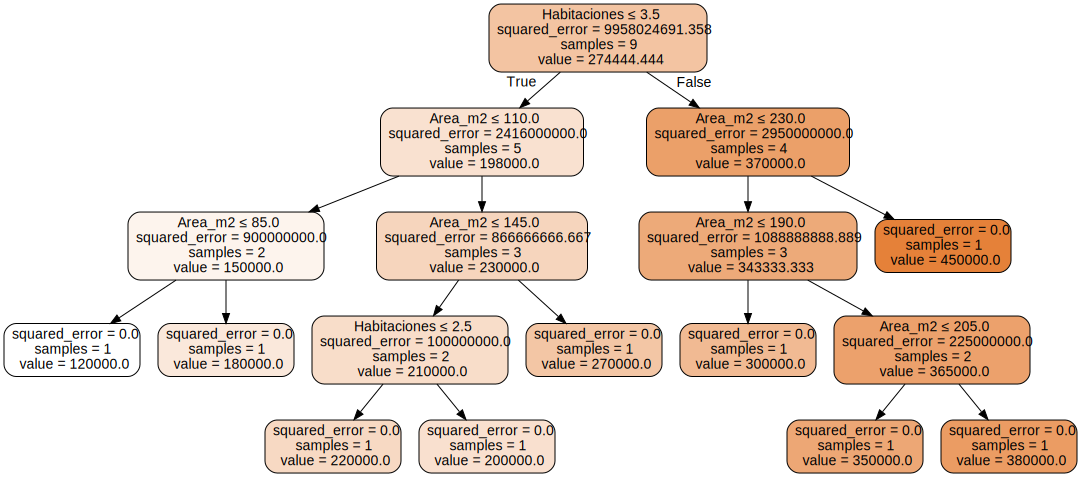

In [8]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph